Leitura dos arquivos LHE com a biblioteca pylhe

Monalisa Hansen

In [1]:
!pip install pylhe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.0/908.0 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.9/655.9 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.0/308.0 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 14.5 MB/s eta 0:00:00


In [2]:
!pip install particle

In [3]:
import pylhe
import itertools
import pandas as pd
from particle import Particle, PDGID
import numpy as np
import matplotlib.pyplot as plt

In [4]:
lhe_fundo_path = 'fundo.lhe.gz'
lhe_sinal_path = 'sinal.lhe.gz'

## [1] Leitura do Arquivo
# ler os dados dos arquivos lhe em um objeto estruturado LHEFile
# pylhe lida automaticamente com a descompressão .gz
fundo_data = pylhe.LHEFile.fromfile(lhe_fundo_path)
sinal_data = pylhe.LHEFile.fromfile(lhe_sinal_path)

## [2a] Investigação Preliminar do Arquivo
# acessar o número total de eventos
print('Resultado etapa 2a:')
print(f'Número de eventos da amostra (fundo): {pylhe.LHEFile.count_events(lhe_fundo_path)}')
print(f'Número de eventos da amostra (sinal): {pylhe.LHEFile.count_events(lhe_sinal_path)}')
print("-" * 50)
## [2b] Investigação Preliminar dos Eventos

# acessar os eventos
events_fundo = fundo_data.events
events_sinal = sinal_data.events

# teste de sanidade para garantir que todos os eventos resultaram nas mesmas partículas finais
end_sets = set()

for event in itertools.islice(events_sinal, 1):
  pds_finals = tuple(sorted([p.id for p in event.particles if p.status == 1]))
  end_sets.add(pds_finals)

print('Teste de sanidade:')
print(f'Combinações de partículas finais encontradas: {len(end_sets)}')

# acessar as informações do primeiro evento
print('\nInformações brutas do primeiro evento:')
first_event_fundo = next(itertools.islice(events_fundo, 0, 1))
first_event_sinal = next(itertools.islice(events_sinal, 0, 1))
print(f'Fundo: {first_event_fundo}')
print(f'Sinal: {first_event_sinal}')
print("-" * 50)

# função que analisa e classifica as partículas por status
def analisar_topologia(file_name, n_events=1):
  """
  Lê os primeiros n eventos e imprime uma tabela de partículas por status.
  """
  print(f"\nAnalisando o arquivo: {file_name}")

  # criar novamente o gerador para garantir a leitura do início
  try:
    events = pylhe.LHEFile.fromfile(file_name).events

    # pegar o primeiro evento para analisar
    for event in itertools.islice(events, n_events):
      initial = []
      intermediate = []
      final = []

      for p in event.particles:
        try:
          # extrair o nome da partícula usando a classe Particle
          p_info = Particle.from_pdgid(p.id)
          p_name = p_info.name

        # dá um erro caso a biblioteca não ache a partícula
        except Exception:
          print(f'{p_name} (ID: {p.id})')

        info = f'{p_name} (ID: {p.id})'

        # classificar as partículas presentes nos eventos pelos seus status
        if p.status == -1:
          initial.append(info)
        elif p.status == 2:
          intermediate.append(info)
        elif p.status == 1:
          final.append(info)

      # construir a tabela
      print(f'\nEvento do arquivo {file_name}:')

      print(f'[Status -1] Iniciais (Colisão): {', '.join(initial)}')
      print(f'[Status  2] Intermediárias (Ressonâncias): {', '.join(intermediate)}')
      print(f'[Status  1] Finais (Detectáveis): {', '.join(final)}')

      # ajuda visual para deduzir o processo
      # formato: Iniciais -> Intermediárias -> Finais
      print(f'\nResumo Visual do Processo do arquivo {file_name}:')
      processo_str = f"{' + '.join([p.split()[0] for p in initial])} -> "
      if intermediate: # no caso do sinal de fundo não tem
          processo_str += f"{' + '.join([p.split()[0] for p in intermediate])} -> "
      processo_str += f"{' + '.join([p.split()[0] for p in final])}"
      print(processo_str)

  except Exception as e:
    print(f'Erro geral: {e}')

print('Resultado etapa 2b')
analisar_topologia(lhe_fundo_path)
analisar_topologia(lhe_sinal_path)

Resultado etapa 2a:
Número de eventos da amostra (fundo): 10000
Número de eventos da amostra (sinal): 10000
--------------------------------------------------
Teste de sanidade:
Combinações de partículas finais encontradas: 1

Informações brutas do primeiro evento:
Fundo: LHEEvent(eventinfo=LHEEventInfo(nparticles=6, pid=1, weight=0.00021642, scale=139.711, aqed=0.007546771, aqcd=0.1213718), particles=[LHEParticle(id=2, status=-1, mother1=0, mother2=0, color1=501, color2=0, px=0.0, py=0.0, pz=121.19303268, e=121.19303268, m=0.0, lifetime=0.0, spin=-1.0), LHEParticle(id=-2, status=-1, mother1=0, mother2=0, color1=0, color2=501, px=-0.0, py=-0.0, pz=-40.264624536, e=40.264624536, m=0.0, lifetime=0.0, spin=1.0), LHEParticle(id=-11, status=1, mother1=1, mother2=2, color1=0, color2=0, px=26.445356282, py=29.771689549, pz=-3.5529687932, e=39.97916901, m=0.0, lifetime=0.0, spin=-1.0), LHEParticle(id=11, status=1, mother1=1, mother2=2, color1=0, color2=0, px=-43.539580033, py=-33.358538052, pz


[sinal.lhe.gz]
Total de eventos lidos: 10000
Eventos representados no gráfico pt: 9995
Eventos representados no gráfico phi: 10000
Eventos representados no gráfico eta: 9973

[fundo.lhe.gz]
Total de eventos lidos: 10000
Eventos representados no gráfico pt: 9988
Eventos representados no gráfico phi: 10000
Eventos representados no gráfico eta: 10000


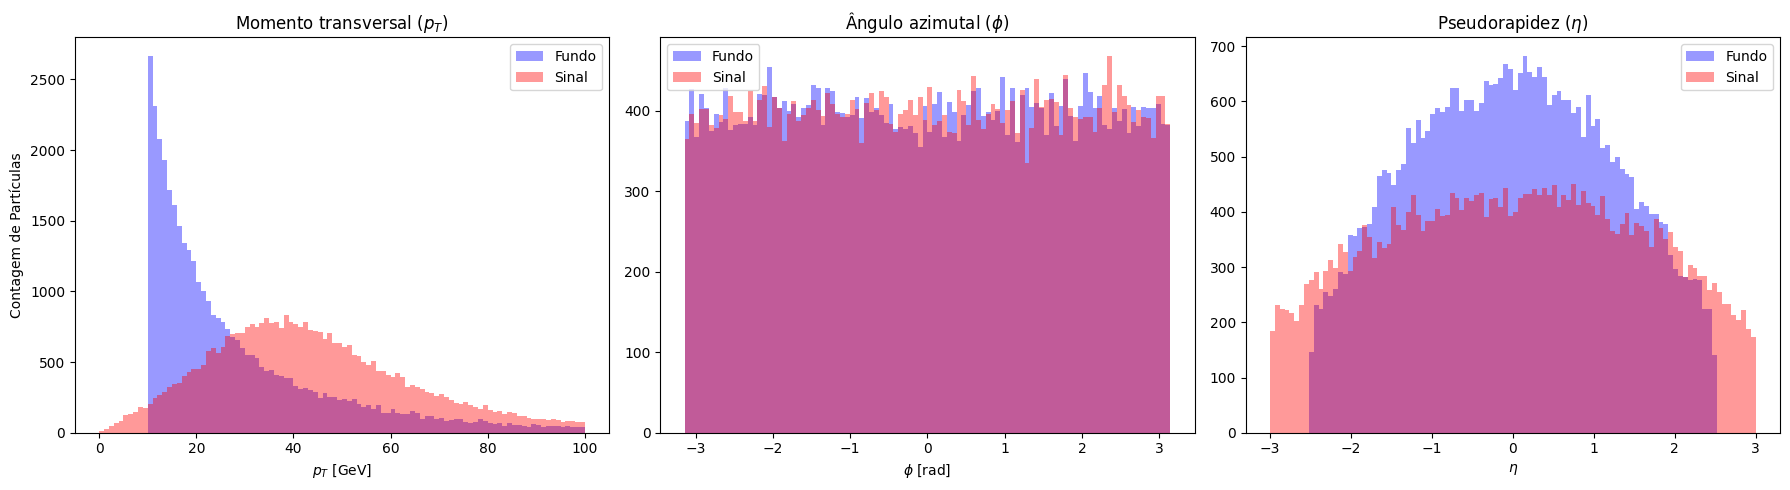

In [5]:
## [3] Exploração do Conteúdo

### Objetivo 1 - Construir histogramas para as partículas de estado final (exceto neutrinos):
def variaveis_cinematicas(p):
  """Calcula as variáveis cinemáticas (pT, eta e phi) para uma partícula."""

  # calcular momento transversal pt
  pt = np.sqrt(p.px**2 + p.py**2)

  # calcular o ângulo azimutal phi
  phi = np.arctan2(p.py, p.px)

  # calcular o módulo do momento total
  p_mag = np.sqrt(p.px**2 + p.py**2 + p.pz**2)

  # evitar divisão por zero
  if p_mag == 0:
    eta = 1e10 # eta muito alto (a particula sai aproximadamente paralela ao feixe)
  else:
    eta = 0.5 * np.log((p_mag + p.pz) / (p_mag - p.pz))

  return pt, phi, eta

def processar_eventos(file_name, pt_min, pt_max, phi_min, phi_max, eta_min, eta_max):
  """
  Lê o arquivo LHE e extrai listas de pT, eta e phi
  para partículas finais (status == 1), excluindo neutrinos
  """
  pts, phis, etas = [], [], []
  neutrinos_ids = [12, 14, 16]

  # contadores
  total_events = 0
  events_pt, events_phi, events_eta = 0, 0, 0

  # criar novamente o gerador para garantir a leitura do início
  events = pylhe.LHEFile.fromfile(file_name).events

  for event in events:
    total_events += 1

    # flag para saber se esse evento contribuiu para o gráfico
    valid_pt = False
    valid_phi = False
    valid_eta = False

    for p in event.particles:
      if p.status == 1 and p.id not in neutrinos_ids:
        pt, phi, eta = variaveis_cinematicas(p)

        # aplicação dos limites
        pt_lim = (pt >= pt_min) and (pt <= pt_max)
        if pt_lim:
          pts.append(pt)
          valid_pt = True

        phi_lim = (phi >= phi_min) and (phi <= phi_max)
        if phi_lim:
          phis.append(phi)
          valid_phi = True

        eta_lim = (eta >= eta_min) and (eta <= eta_max)
        if eta_lim:
          etas.append(eta)
          valid_eta = True

    if valid_pt:
      events_pt += 1

    if valid_phi:
      events_phi += 1

    if valid_eta:
      events_eta += 1

  ### Objetivo 2 - Verificar o número de eventos em cada histograma
  print(f"\n[{file_name}]")
  print(f"Total de eventos lidos: {total_events}")
  print(f"Eventos representados no gráfico pt: {events_pt}")
  print(f"Eventos representados no gráfico phi: {events_phi}")
  print(f"Eventos representados no gráfico eta: {events_eta}")

  return pts, phis, etas

pt_sinal, phi_sinal, eta_sinal = processar_eventos(lhe_sinal_path, 0, 100, -np.pi, np.pi, -3, 3)
pt_fundo, phi_fundo, eta_fundo = processar_eventos(lhe_fundo_path, 0, 100, -np.pi, np.pi, -3, 3)

# HISTOHGRAMAS
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

bins = 100

# histograma do momento transversal pt
ax[0].hist(pt_fundo, bins=bins, range=(0, 100), alpha=0.4, label='Fundo', color='blue', density=False)
ax[0].hist(pt_sinal, bins=bins, range=(0, 100), alpha = 0.4, label='Sinal', color='red', density=False)
ax[0].set_title(r'Momento transversal ($p_T$)')
ax[0].set_xlabel(r'$p_T$ [GeV]')
ax[0].set_ylabel('Contagem de Partículas')
ax[0].legend()

# histograma do ângulo azimutal phi
ax[1].hist(phi_fundo, bins=bins, range=(-np.pi, np.pi), alpha=0.4, label='Fundo', color='blue', density=False)
ax[1].hist(phi_sinal, bins=bins, range=(-np.pi, np.pi), alpha = 0.4, label='Sinal', color='red', density=False)
ax[1].set_title(r'Ângulo azimutal ($\phi$)')
ax[1].set_xlabel(r'$\phi$ [rad]')
ax[1].legend()

# histograma da pseudorapidez eta
ax[2].hist(eta_fundo, bins=bins, range=(-3, 3), alpha=0.4, label='Fundo', color='blue', density=False)
ax[2].hist(eta_sinal, bins=bins, range=(-3, 3), alpha = 0.4, label='Sinal', color='red', density=False)
ax[2].set_title(r'Pseudorapidez ($\eta$)')
ax[2].set_xlabel(r'$\eta$')
ax[2].legend()

plt.tight_layout()
plt.show()

### Pergunta:
Os histogramas acima representam todos os eventos do arquivo LHE?  
Se não, explique o porquê (por exemplo: presença ou ausência de certas partículas nos eventos).

Não, os histogramas acima não representam a totalidade de partículas/eventos contidos no arquivo LHE. Primeiro porque foi aplicado um filtro para excluir neutrinos. Além disso, foram filtradas apenas partículas com status = 1 (finais), ignorando as intermediárias.  
Também tiveram os cortes nas variáveis cinemáticas, em que os histogramas foram limitados a intervalos específicos. Partículas com momento maior que 100 GeV ou com $|\eta| < -3$, não aparecem visualmente dentro da janela do histograma.


[sinal.lhe.gz]
Total de eventos lidos: 10000
Eventos representados no gráfico pt: 9841
Eventos representados no gráfico phi: 10000
Eventos representados no gráfico eta: 9840

[fundo.lhe.gz]
Total de eventos lidos: 10000
Eventos representados no gráfico pt: 8025
Eventos representados no gráfico phi: 10000
Eventos representados no gráfico eta: 10000


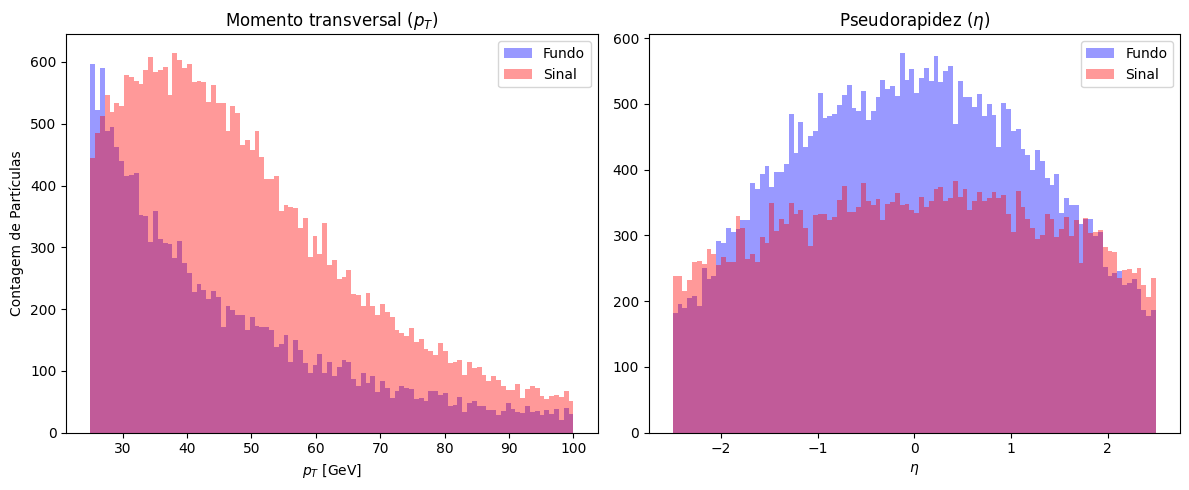

In [6]:
## [4] Filtros e Cortes Cinemáticos

### Objetivo 1 - Analisar se cortes cinemáticos simples ajudam a remover o fundo.
### Objetivo 2 - Se for útil, aplique o corte e reconstrua os histogramas com a nova seleção.

pt_sinal_cut, phi_sinal, eta_sinal_cut = processar_eventos(lhe_sinal_path, 25, 100, -np.pi, np.pi, -2.5, 2.5)
pt_fundo_cut, phi_fundo, eta_fundo_cut = processar_eventos(lhe_fundo_path, 25, 100, -np.pi, np.pi, -2.5, 2.5)

# HISTOHGRAMAS
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

bins = 100

# histograma do momento transversal pt
ax[0].hist(pt_fundo_cut, bins=bins, range=(25, 100), alpha=0.4, label='Fundo', color='blue', density=False)
ax[0].hist(pt_sinal_cut, bins=bins, range=(25, 100), alpha = 0.4, label='Sinal', color='red', density=False)
ax[0].set_title(r'Momento transversal ($p_T$)')
ax[0].set_xlabel(r'$p_T$ [GeV]')
ax[0].set_ylabel('Contagem de Partículas')
ax[0].legend()

# histograma da pseudorapidez eta
ax[1].hist(eta_fundo_cut, bins=bins, range=(-2.5, 2.5), alpha=0.4, label='Fundo', color='blue', density=False)
ax[1].hist(eta_sinal_cut, bins=bins, range=(-2.5, 2.5), alpha = 0.4, label='Sinal', color='red', density=False)
ax[1].set_title(r'Pseudorapidez ($\eta$)')
ax[1].set_xlabel(r'$\eta$')
ax[1].legend()

plt.tight_layout()
plt.show()


### Cortes
Corte em $p_T$: analisando o primeiro gráfico, o fundo (azul) domina a região abaixo de 25 GeV. O Sinal (vermelho) só começa a ficar relevante acima disso. Cortando tudo que tem $p_T \leq 25$ GeV, aproximadamente 20% do fundo é eliminado $((1 - (8025/9988))*100)$ perdendo pouco sinal, visto que o número de eventos do sinal reduziu em apenas 1,47% após o corte $((1 - (9841/9995))*100)$.

Corte em $\eta$: embora os gráficos de $\eta$ sejam parecidos, foi aplicado um corte de $|\eta| \leq 2,5$ para as curvas se sobreporem. O número de eventos do sinal reduziu em apenas 1,33% após o corte $((1 - (9840/9973))*100)$.